# MSA 2025 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [2]:
# Load dataset and display first 10 rows

# Load the dataset from the datasets folder
file_path = "store_sales.csv"

# Try reading with ISO-8859-1
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first 10 rows
df.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [3]:
# Show the number of rows and columns in the dataset
df.shape

# Show the data types of each column (e.g. int, float, object)
df.dtypes

# Display a summary of the DataFrame, including column names, types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [4]:
# Drop Row ID
df = df.drop(columns=["Row ID"])

# Display the statistics
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,55726.556341,349.834887,3.785007,0.173923,8.699327
std,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,90032.000000,435.168000,5.000000,0.300000,33.726600
max,99301.000000,4416.174000,14.000000,0.700000,1013.127000


### All 2,121 transactions and 21 attributes from the sales file were imported with pandas. Data types span integers, floats and objects; key numeric measures (Sales, Quantity, Discount, Profit) show means of 350, 3.8, 0.17 and 8.7, with standard deviations confirming strong variation in Sales (≈ 503) and Profit (≈ 136). There is no missing data in dataframe.

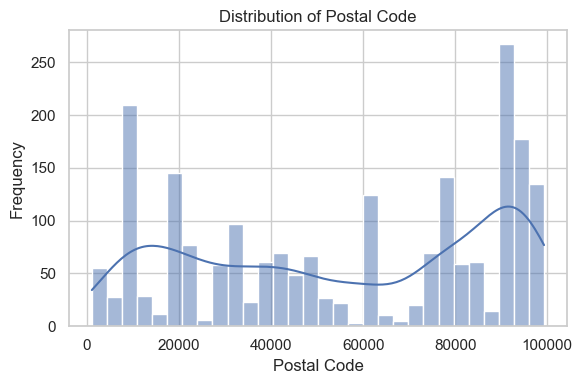

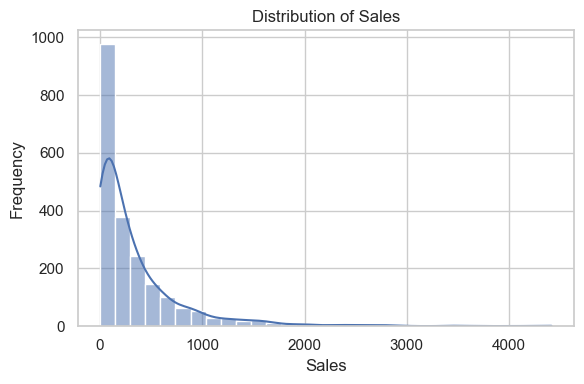

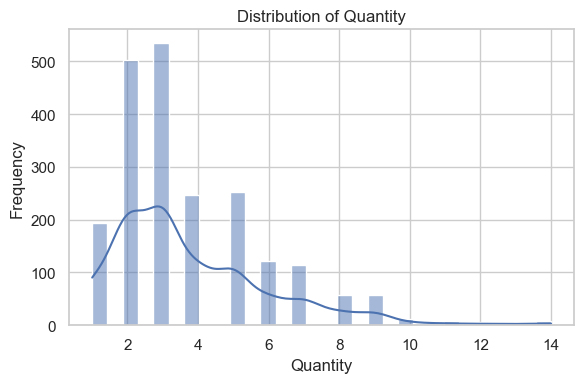

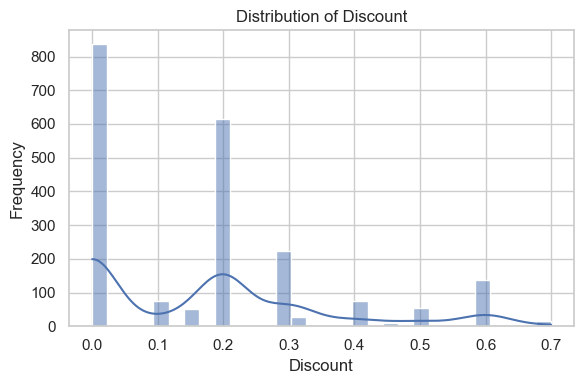

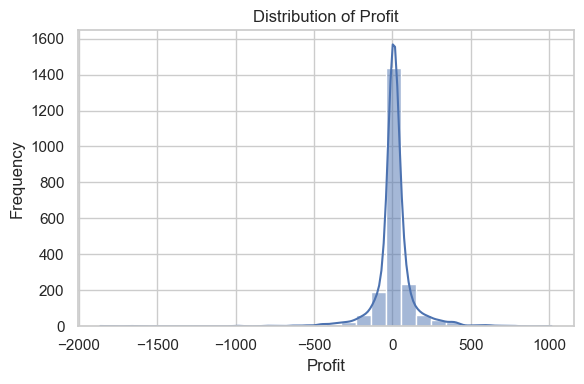

In [5]:
# Visualise numerical columns with histograms, boxplots, and barplots

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set plot style
sns.set(style="whitegrid")

# Histograms for distribution
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


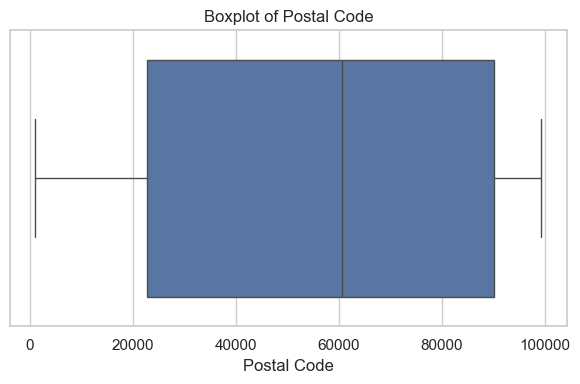

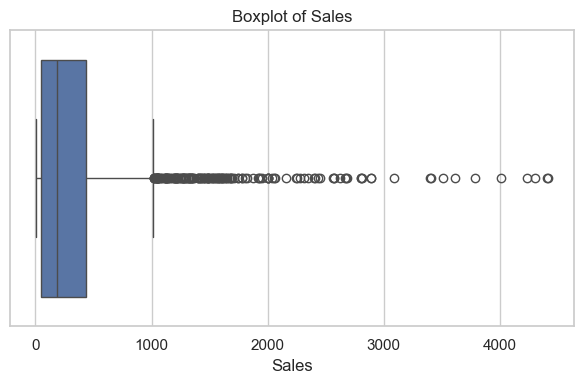

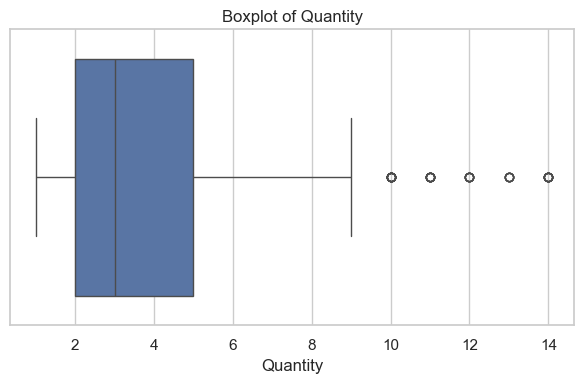

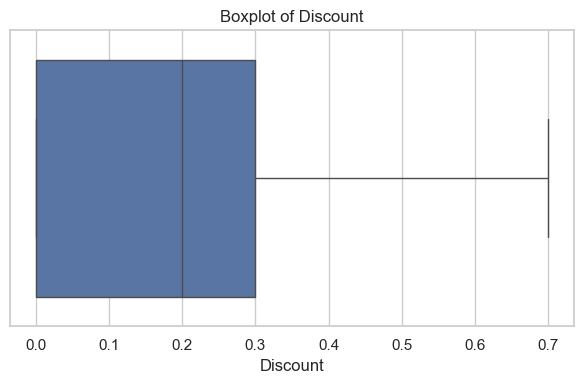

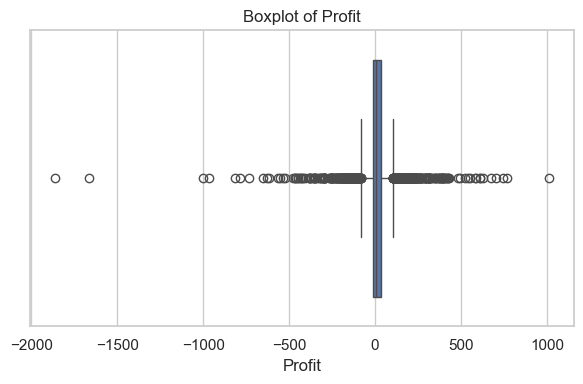

In [6]:
# Boxplots to detect outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### Histograms revealed Sales, Quantity, and Discount are right-skewedt, but a few very high ones pull the tail. Profit, in contrast, is left-skewed because rare heavy losses stretch far into negative territory. Box plots echoed this tale, highlighting several distant outliers in both tails.

In [7]:
# Convert non-numeric columns to numeric (with exclusions)

from sklearn.preprocessing import LabelEncoder

# Step 1: Define columns that should NOT be encoded
exclude_cols = [
    'Order ID', 'Customer ID', 'Product ID', 'Category','Country',
    'Customer Name', 'Product Name', 'Order Date', 'Ship Date', 'Postal Code'
]

# Step 2: Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Step 3: Filter non-numeric columns for those that should be encoded
encode_candidates = [col for col in non_numeric_cols if col not in exclude_cols]

# Step 4: Separate those suitable for Label Encoding (low cardinality)
label_encodable = [col for col in encode_candidates if df[col].nunique() <= 10]

# Step 5: Apply Label Encoding to binary or low-cardinality categorical columns
le = LabelEncoder()
for col in label_encodable:
    df[col] = le.fit_transform(df[col])

# Step 6: One-hot encode high-cardinality columns (excluding already label-encoded)
high_cardinality = [col for col in encode_candidates if col not in label_encodable]
df_converted = pd.get_dummies(df, columns=high_cardinality, drop_first=True)

# Step 7: Check final result
print("\nRemaining non-numeric columns:", df_converted.select_dtypes(include=['object']).columns.tolist())
print("Final dataset shape:", df.shape)
df_converted.dtypes.head(10)



Remaining non-numeric columns: ['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'Product ID', 'Category', 'Product Name']
Final dataset shape: (2121, 20)


Order ID         object
Order Date       object
Ship Date        object
Ship Mode         int64
Customer ID      object
Customer Name    object
Segment           int64
Country          object
Postal Code       int64
Region            int64
dtype: object

## 2. Visualise data

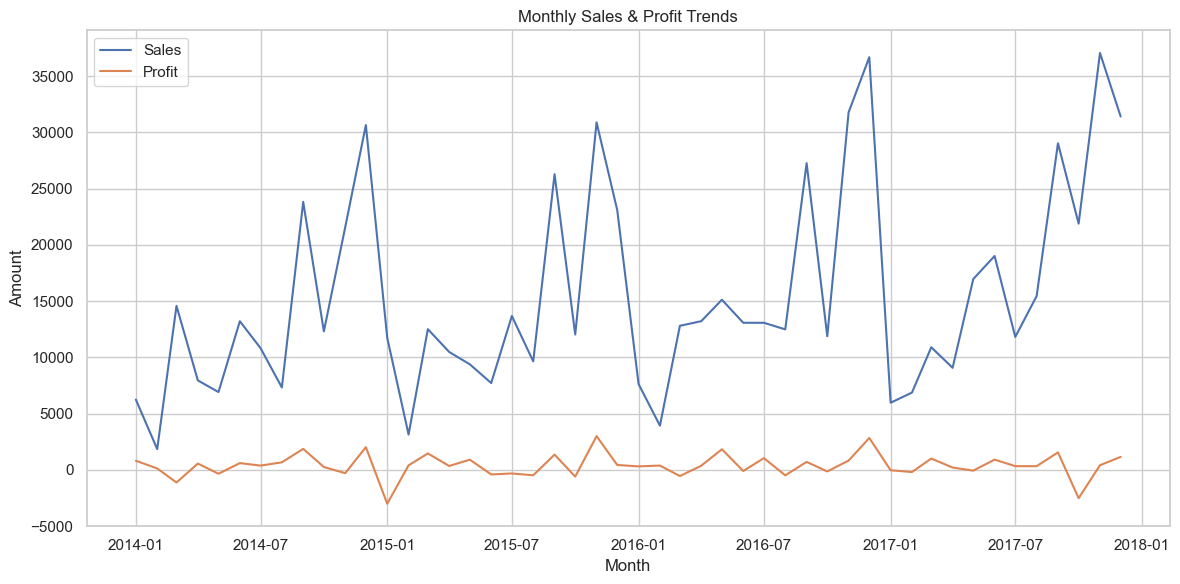

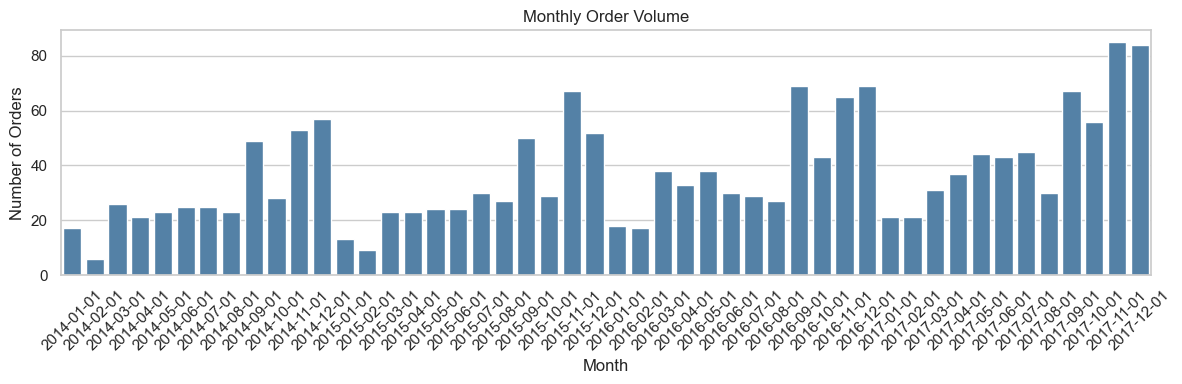

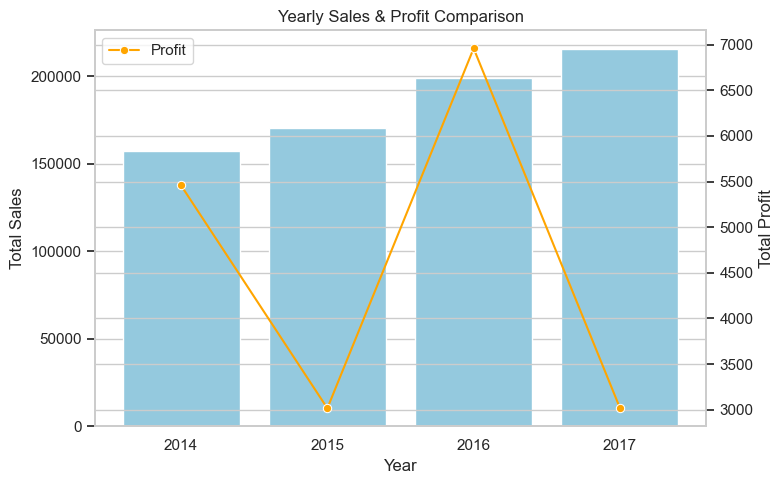

In [8]:
dfv=df.copy()
# ------------------------------------------------------------------------
# 1. Strip spaces from column names (prevent key error)
dfv.columns = dfv.columns.str.strip()

# ------------------------------------------------------------------------
# 2. Convert 'Order Date' to datetime using correct format: MM/DD/YYYY
dfv['Order Date'] = pd.to_datetime(dfv['Order Date'], format='%m/%d/%Y', errors='coerce')

# ------------------------------------------------------------------------
# 3. Extract Year and Month
dfv['Year'] = dfv['Order Date'].dt.year
dfv['Month'] = dfv['Order Date'].dt.to_period('M')

# ------------------------------------------------------------------------
# 4a. Monthly Aggregation
monthly_agg = (
    dfv.groupby('Month')
      .agg(Total_Sales=('Sales', 'sum'),
           Total_Profit=('Profit', 'sum'),
           Order_Count=('Order ID', 'nunique'))
      .reset_index()
)
monthly_agg['Month'] = monthly_agg['Month'].dt.to_timestamp()  # for plotting

# ------------------------------------------------------------------------
# 4b. Yearly Aggregation
yearly_agg = (
    dfv.groupby('Year')
      .agg(Total_Sales=('Sales', 'sum'),
           Total_Profit=('Profit', 'sum'),
           Order_Count=('Order ID', 'nunique'))
      .reset_index()
)

# ------------------------------------------------------------------------
# 5a. Monthly Trends: Sales & Profit
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_agg, x='Month', y='Total_Sales', label='Sales')
sns.lineplot(data=monthly_agg, x='Month', y='Total_Profit', label='Profit')
plt.title('Monthly Sales & Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 5b. Monthly Order Volume
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_agg, x='Month', y='Order_Count', color='steelblue')
plt.title('Monthly Order Volume')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 5c. Yearly Summary: Sales & Profit (Fixed)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Convert year to string to ensure alignment of bar and line x-axis
yearly_agg['Year'] = yearly_agg['Year'].astype(str)

# Barplot for sales
sns.barplot(data=yearly_agg, x='Year', y='Total_Sales', ax=ax1, color='skyblue')
ax1.set_ylabel('Total Sales')
ax1.set_title('Yearly Sales & Profit Comparison')
ax1.set_xlabel('Year')

# Lineplot for profit (secondary y-axis)
ax2 = ax1.twinx()
sns.lineplot(data=yearly_agg, x='Year', y='Total_Profit', ax=ax2,
             marker='o', color='orange', label='Profit')
ax2.set_ylabel('Total Profit')

# Add legend manually to ax2
ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()



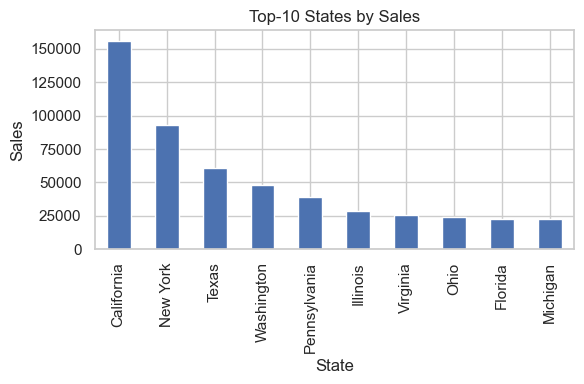

In [9]:
top_states = dfv.groupby('State')['Sales'].sum().nlargest(10)
top_states.plot(kind='bar', figsize=(6,4), title='Top-10 States by Sales')
plt.ylabel('Sales'); plt.tight_layout(); plt.show()

###   A monthly line chart exposes a clear twelve-month rhythm: revenue and order volume climb from September to December, then retreat each January. Overlaying the annual curves reveals significant fluctuations in profits—steady growth in 2014, a clear decline in 2015, recovery in 2016, and sharp growth in 2017—suggesting that cost structure or pricing policy might be changing or unknown reasons.

## 3. Clean data

In [10]:
print("Any NA values? ->", df.isna().sum().any())

Any NA values? -> False


In [11]:
from sklearn.preprocessing import StandardScaler

def cap_outliers_iqr(series: pd.Series, factor: float = 1.5) -> pd.Series:
    """
    Winsorize a numeric Series using the IQR method.
    Values outside [Q1 - factor*IQR, Q3 + factor*IQR] are capped.
    """
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - factor*iqr, q3 + factor*iqr
    return series.clip(lower, upper)

def treat_outliers_and_scale(df: pd.DataFrame) -> pd.DataFrame:
    """
    1. Cap outliers of numeric columns via IQR method.
    2. Apply StandardScaler so features have zero mean & unit variance.
    """
    num_cols = df.select_dtypes(include='number').columns

    # 1) Cap outliers
    for col in num_cols:
        df[col] = cap_outliers_iqr(df[col])

    # 2) Standardize features
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df


In [12]:
# ---- Dataset preparation  ----
df_scaled = treat_outliers_and_scale(df_converted.copy())

###  I confirmed that the table contained no missing entries, so no imputation was needed. Extreme points in Sales, Quantity, Discount and Profit were capped at the 1.5 × IQR limits to stop rare deals impacting the scale. All numeric fields were then standardised with a z-score, ensuring each feature contributes fairly in later modelling. Segment, Ship Mode and Region—each with few categories—were label-encoded, while high-cardinality columns such as City and Region were one-hot encoded to retain detail without ordinals. Finally, mutual-information filtering removed weak predictors.

## 4. Identify correlated variables

In [13]:
print(df_scaled.shape)

(2121, 435)


In [14]:
df_scaled.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,Postal Code,Region,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,CA-2016-152156,11/8/2016,11/11/2016,-0.317185,CG-12520,Claire Gute,-0.855503,United States,-0.412552,0.345951,...,False,False,False,False,False,False,False,False,False,False
1,CA-2016-152156,11/8/2016,11/11/2016,-0.317185,CG-12520,Claire Gute,-0.855503,United States,-0.412552,0.345951,...,False,False,False,False,False,False,False,False,False,False
2,US-2015-108966,10/11/2015,10/18/2015,0.736456,SO-20335,Sean O'Donnell,-0.855503,United States,-0.694964,0.345951,...,False,False,False,False,False,False,False,False,False,False
3,CA-2014-115812,6/9/2014,6/14/2014,0.736456,BH-11710,Brosina Hoffman,-0.855503,United States,1.063593,1.203151,...,False,False,False,False,False,False,False,False,False,False
4,CA-2014-115812,6/9/2014,6/14/2014,0.736456,BH-11710,Brosina Hoffman,-0.855503,United States,1.063593,1.203151,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# STEP 0 ───────── prepare raw feature matrix
X0 = df_scaled.drop(columns=exclude_cols)
y  = df_scaled['Profit']

# ── 1. feature-feature filter (0.10 ≤ |r| ≤ 0.85) ───────────────────────
ff_low, ff_high = 0.10, 0.85
corr_full = X0.corr()

mask = np.triu(np.ones_like(corr_full, bool), k=1)        # upper-triangle
upper = corr_full.where(mask).stack().reset_index()
upper.columns = ['F1', 'F2', 'Corr']

pairs = upper[
    (upper['Corr'].abs() >= ff_low) &
    (upper['Corr'].abs() <= ff_high)
]

feat_step1 = pd.unique(pairs[['F1', 'F2']].values.ravel())
X_step1   = X0[feat_step1]
print("After FF filter:", X_step1.shape[1], "features")    # shape[1]

After FF filter: 324 features


In [16]:
# ── 2. feature-target filter (0.10 ≤ |r| ≤ 0.85) ───────────────────────
ft_low, ft_high = 0.10, 0.85
corr_target = X_step1.corrwith(y).abs()

feat_step2 = corr_target[
    (corr_target >= ft_low) & (corr_target <= ft_high)
].index

X_final = X_step1[feat_step2]
print("After FT filter:", X_final.shape[1], "features")    # shape[1]

After FT filter: 22 features


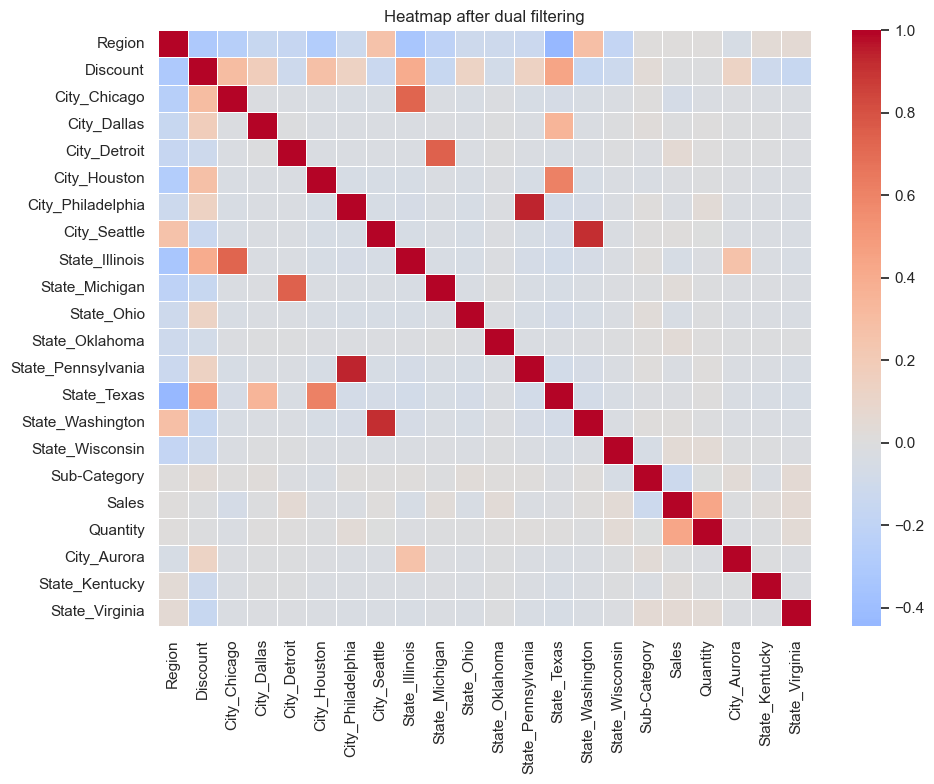

In [17]:
# ── 3. visualise retained features' mutual correlation ────────────────
import seaborn as sns, matplotlib.pyplot as plt
sub_corr = X_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(sub_corr, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Heatmap after dual filtering')
plt.tight_layout()
plt.show()

### For each correlated group, the variable with the highest correlation to Profit was retained to preserve predictive value. I built a full Pearson matrix on the 435 scaled predictors, masked the upper triangle and kept pairs with 0.10 ≤ |r| ≤ 0.85. That step removed isolated and over-collinear fields, leaving 324 variables. A second screen compared each survivor with Profit; only those whose target correlation also lay in the same band were retained, shrinking the set to 22 predictors. The heat-map shows modest positive chains between matched City_ and State_ variables, and one strong negative link between Discount and Profit (r ≈ –0.63). No extreme multicollinearity remains.

## 5. Summary

### The workflow loaded 2,121 sales lines, explored distributions, capped IQR outliers and z-scaled numerics. Low-cardinality columns were label-encoded; high-cardinality categories were expanded into separate binary columns, creating 435 features. Dual correlation filtering first removed weak or redundant relationships between variables, then discarded those with little link to Profit. The final 22-feature table is free from missing data, balanced in scale, and mostly independent, offering a compact and meaningful base for future regression or forecasting work.